In [0]:
pip install networkx

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import networkx as nx
import pylab as plt 
from operator import itemgetter
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.cluster


In [0]:
g = nx.read_edgelist('/content/drive/My Drive/yeast.edgelist')
#nx.draw_networkx(g, with_labels=True)

#nx.draw_spring(g, with_labels=False)
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.savefig('yeast_protein.png')


In [0]:
nx.write_gexf(g, 'quaker_network.gexf')

In [0]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 6526
Number of edges: 532180
Average degree: 163.0953


In [0]:
print(nx.nodes(g))

['YLR418C', 'YOL145C', 'YOR123C', 'YBR279W', 'YML069W', 'YGL244W', 'YGL207W', 'YER164W', 'YIL035C', 'YOR061W', 'YGL019W', 'YOR039W', 'YDL209C', 'YDR364C', 'YMR213W', 'YLR117C', 'YGR278W', 'YGL128C', 'YBR065C', 'YJR050W', 'YPL213W', 'YLL036C', 'YGL120C', 'YAL032C', 'YPL151C', 'YHR165C', 'YER029C', 'YGR074W', 'YLR147C', 'YPR101W', 'YKL173W', 'YDR416W', 'YGR129W', 'YKL095W', 'YKR022C', 'YLR424W', 'YNL245C', 'YIR010W', 'YBR211C', 'YDR254W', 'YPL018W', 'YLR381W', 'YJR135C', 'YAL034W-A', 'YDR383C', 'YPL233W', 'YGR179C', 'YJL091C', 'YHR019C', 'YCL061C', 'YOR254C', 'YDR170C', 'YJR100C', 'YNL124W', 'YLR175W', 'YJL072C', 'YDR013W', 'YOL146W', 'YDR489W', 'YDL140C', 'YIL021W', 'YGR116W', 'YGR186W', 'YGR005C', 'YPL129W', 'YML010W', 'YOR151C', 'YPL063W', 'YMR203W', 'YDR288W', 'YEL019C', 'YLR007W', 'YDL105W', 'YLR383W', 'YOL034W', 'YDR365C', 'YDR299W', 'YJL033W', 'YER127W', 'YOR310C', 'YHR196W', 'YGR145W', 'YFR003C', 'YER133W', 'YKL193C', 'YGR002C', 'YJL081C', 'YLR384C', 'YOR244W', 'YDR190C', 'YPL235

In [0]:
density_graph = nx.density(g)
print(density_graph)

0.024995449971408207


In [9]:
#The average of the shortest path lengths for all possible node pairs.
# Gives a measure of ‘tightness’ of the Graph and can be used to understand how quickly/easily something flows in this Network.
avg_pathlength = nx.average_shortest_path_length(g)
print(avg_pathlength)

2.2092090230296026


# **Centrality **
After getting some basic measures of the entire network structure, a good next step is to find which nodes are the most important ones in your network. In network analysis, measures of the importance of nodes are referred to as centrality measures.

# Degree Centrality
After getting some basic measures of the entire network structure, a good next step is to find which nodes are the most important ones in your network. In network analysis, measures of the importance of nodes are referred to as centrality measures. Degree centrality produce dictionaries in which the keys are nodes and the values are centrality measures. 
Degree can tell you about the biggest hubs, but it can’t tell you that much about the rest of the nodes.

In [10]:
#degree_centrality: The degree centrality for a node v is the fraction of nodes it is connected to.
degree_centrality = nx.degree_centrality(g)
print(degree_centrality)
sorted_degree = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)

{'YLR418C': 0.15157088122605364, 'YOL145C': 0.029425287356321838, 'YOR123C': 0.07279693486590039, 'YBR279W': 0.023448275862068966, 'YML069W': 0.1068199233716475, 'YGL244W': 0.11003831417624521, 'YGL207W': 0.048122605363984675, 'YER164W': 0.0735632183908046, 'YIL035C': 0.05624521072796935, 'YOR061W': 0.06007662835249042, 'YGL019W': 0.07877394636015325, 'YOR039W': 0.07770114942528736, 'YDL209C': 0.01685823754789272, 'YDR364C': 0.025134099616858238, 'YMR213W': 0.04689655172413793, 'YLR117C': 0.043065134099616854, 'YGR278W': 0.02467432950191571, 'YGL128C': 0.00475095785440613, 'YBR065C': 0.027126436781609194, 'YJR050W': 0.029425287356321838, 'YPL213W': 0.10574712643678161, 'YLL036C': 0.07938697318007662, 'YGL120C': 0.07019157088122605, 'YAL032C': 0.0367816091954023, 'YPL151C': 0.0346360153256705, 'YHR165C': 0.0357088122605364, 'YER029C': 0.01808429118773946, 'YGR074W': 0.0582375478927203, 'YLR147C': 0.010421455938697317, 'YPR101W': 0.04582375478927203, 'YKL173W': 0.06314176245210727, 'YDR4

In [11]:

df_1 = DataFrame (sorted_degree,columns=['Protein','Degree_Centrality'])
df_2 = df_1.head(10)
df_2

,Protein,Degree_Centrality
0,YDL160C,0.554636
1,YAL021C,0.483525
2,YGL122C,0.415632
3,YFL039C,0.352490
4,YNL209W,0.319540
5,YLL013C,0.302069
6,YBR245C,0.284904
7,YFL034C-B,0.267586
8,YPL240C,0.245670
9,YOR198C,0.208123


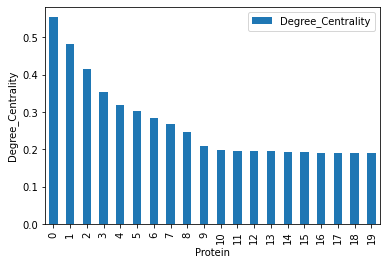

In [0]:
df_2.plot.bar()
plt.xlabel("Protein") 
plt.ylabel("Degree_Centrality") 
plt.show()

# **Eigenvector centrality** 
Is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. If you know a lot of well-connected people, you could spread a message very efficiently.

In [0]:
eigenvector_dict = nx.eigenvector_centrality(g)
nx.set_node_attributes(g, eigenvector_dict, 'eigenvector')

In [0]:
sorted_eigenvector_centrality = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)


In [0]:
df_3 = DataFrame (sorted_eigenvector_centrality,columns=['Protein','eigenvector_Centrality'])
df_4 = df_1.head(20)
df_4

,Protein,Degree_Centrality
0,YDL160C,0.554636
1,YAL021C,0.483525
2,YGL122C,0.415632
3,YFL039C,0.352490
4,YNL209W,0.319540
5,YLL013C,0.302069
6,YBR245C,0.284904
7,YFL034C-B,0.267586
8,YPL240C,0.245670
9,YOR198C,0.208123


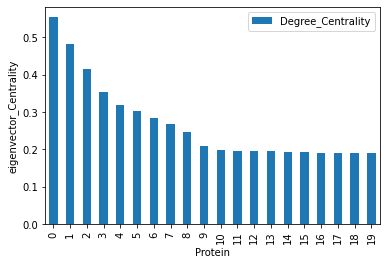

In [0]:
df_2.plot.bar()
plt.xlabel("Protein") 
plt.ylabel("eigenvector_Centrality") 
plt.show()

# Community Detection

A community detection in network dataset is what the subgroups or communities are within the larger social structure. The method greedy_modularity_communities() tries to determine the number of communities appropriate for the graph, and groups all nodes into subsets based on these communities. There’s one set for each group, and the sets contain the names of the people in each group. Using eigenvector centrality as a ranking can give you a sense of the important people within this modularity class. In smaller networks like this one, a common task is to find and list all of the modularity classes and their members.

In [0]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(g)

In [0]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(g, modularity_dict, 'modularity')

In [0]:
 modularity_dict

In [0]:
# First get a list of just the nodes in that class
class0 = [n for n in g.nodes() if g.nodes[n]['modularity'] == 1]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:g.nodes[n]['eigenvector'] for n in class0}
print(class0_eigenvector)

# Then sort that dictionary and print the first 5 results
#class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

#print("Modularity Class 0 Sorted by Eigenvector Centrality:")
#for node in class0_sorted_by_eigenvector[:5]:
    #print("Name:", node[0], "| Eigenvector Centrality:", node[1])

{'YIL035C': 0.01775474359336209, 'YDL209C': 0.00633234459968763, 'YDR364C': 0.009953545255959659, 'YMR213W': 0.01739352712086805, 'YLR117C': 0.016260849022921603, 'YGR278W': 0.009515089129483541, 'YGL128C': 0.0018976893226780314, 'YBR065C': 0.00776368648622008, 'YJR050W': 0.011575806691119631, 'YPL213W': 0.032391769262238176, 'YLL036C': 0.021935996206457555, 'YGL120C': 0.02290310891352631, 'YAL032C': 0.01222899812574134, 'YPL151C': 0.0126392023859175, 'YHR165C': 0.013447769649985435, 'YER029C': 0.005776758318259533, 'YGR074W': 0.01530457735776663, 'YLR147C': 0.0035257430799906352, 'YPR101W': 0.017379971075317635, 'YKL173W': 0.022590622463194734, 'YDR416W': 0.013438012528133573, 'YGR129W': 0.005853485485492597, 'YKL095W': 0.017771607807933177, 'YKR022C': 0.006875144456533702, 'YLR424W': 0.006463139586695474, 'YNL245C': 0.01952250635093929, 'YIR010W': 0.02995679952395343, 'YPL233W': 0.020663639516604687, 'YJL091C': 0.024848783040191395, 'YHR019C': 0.013873740056224278, 'YOR254C': 0.03064

In [0]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c))

Class 0: ['YCL074W', 'YGR018C', 'YBR163W', 'YKL108W', 'YDR506C', 'YBR133C', 'YJL057C', 'YIL111W', 'YPL103C', 'CGI-95', 'YMR280C', 'YDR406W', 'YPL177C', 'YPL262W', 'YBR146W', 'YIL162W', 'tY(GUA)J1', 'YBR125C', 'YDR282C', 'YDR501W', 'YDR096W', 'YKL113C', 'YJL121C', 'b2576', 'RP5-1119D9.3', 'YER058W', 'YKR076W', 'YNR022C', 'YOL155C', 'YGL160W', 'YCL048W-A', 'YCR046C', 'YBL022C', 'YOR352W', 'YMR120C', 'YKL025C', 'YGR097W', 'YKL034W', 'YJL204C', 'YJL060W', 'YNL106C', 'YNL172W', 'YGL151W', 'YHR178W', 'YOR390W', 'YDR369C', 'YCR042C', 'YDL154W', 'YPL111W', 'YNL289W', 'YDR439W', 'YBL098W', 'YNL156C', 'YKL065W-A', 'YNL042W', 'BOS_21879', 'YOL152W', 'YDL079C', 'YOL008W', 'YDR293C', 'YPL148C', 'YLR319C', 'Dmel_CG32742', 'AT5G21170', 'YER024W', 'YPR034W', 'YPL217C', 'YDR260C', 'YER124C', 'YDL047W', 'YNL270C', 'YIL153W', 'YAL065C', 'YER088C', 'YDR378C', 'YGR109W-B', 'YHR189W', 'YBR087W', 'YLR272C', 'YGL093W', 'YLR010C', 'YOR297C', 'YIL049W', 'YPL168W', 'YNL040W', 'YBR018C', 'YER022W', 'YNL086W', 'tc

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2868: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim([0, dvw])


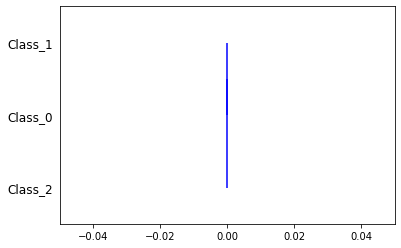

In [0]:
df = pd.DataFrame(communities[7])
df.insert(0, "Class", ['Class_0','Class_1','Class_2',
], True)

# Determine distances (default is Euclidean)
dataMatrix = np.array( df[[]] )
distMat = scipy.spatial.distance.pdist( dataMatrix )

# Cluster hierarchicaly using scipy
clusters = scipy.cluster.hierarchy.linkage(distMat, method='single')
T = scipy.cluster.hierarchy.to_tree( clusters , rd=False )

# Create dictionary for labeling nodes by their IDs
labels = list(df.Class)
id2name = dict(zip(range(len(labels)), labels))

# Draw dendrogram using matplotlib to scipy-dendrogram.pdf
scipy.cluster.hierarchy.dendrogram(clusters, labels=labels, orientation='right')
plt.savefig("scipy-dendrogram.png")

def add_node(node, parent ):
	# First create the new node and append it to its parent's children
	newNode = dict( node_id=node.id, children=[] )
	parent["children"].append( newNode )

	# Recursively add the current node's children
	if node.left: add_node( node.left, newNode )
	if node.right: add_node( node.right, newNode )

# Initialize nested dictionary for d3, then recursively iterate through tree
d3Dendro = dict(children=[], name="Root1")
add_node( T, d3Dendro )

# Label each node with the names of each leaf in its subtree
def label_tree( n ):
	# If the node is a leaf, then we have its name
	if len(n["children"]) == 0:
		leafNames = [ id2name[n["node_id"]] ]
	
	# If not, flatten all the leaves in the node's subtree
	else:
		leafNames = reduce(lambda ls, c: ls + label_tree(c), n["children"], [])

	# Delete the node id since we don't need it anymore and
	# it makes for cleaner JSON
	del n["node_id"]

	# Labeling convention: "-"-separated leaf names
	n["name"] = name = "-".join(sorted(map(str, leafNames)))
	
	return leafNames
